In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from utils import load_data
from outliers import detect_outliers_iqr, handle_outliers, plot_outlier_analysis

In [2]:
df = load_data()

Successfully loaded data from ../data/raw/coffee_sales.csv
Shape: (181, 7)


In [3]:
print("=== OUTLIER ANALYSIS FOR REVENUE ===")
outliers, lower_bound, upper_bound = detect_outliers_iqr(df, 'revenue')

print("\n=== OUTLIER DETAILS ===")
print(outliers[['date', 'revenue', 'is_weekend', 'average_temperature']])

=== OUTLIER ANALYSIS FOR REVENUE ===
Outlier detection for 'revenue':
Q1: 706.19, Q3: 1062.80, IQR: 356.61
Bounds: [171.28, 1597.71]
Found 7 outliers (3.87% of data)

=== OUTLIER DETAILS ===
           date  revenue  is_weekend  average_temperature
28   2023-01-29  7153.93           1                   58
39   2023-02-09  2392.43           0                   66
53   2023-02-23  2155.03           0                   71
67   2023-03-09  1678.96           0                   75
71   2023-03-13  2226.38           0                   80
103  2023-04-14  2121.85           0                   56
142  2023-05-23  2023.27           0                   48


Outlier detection for 'revenue':
Q1: 706.19, Q3: 1062.80, IQR: 356.61
Bounds: [171.28, 1597.71]
Found 7 outliers (3.87% of data)


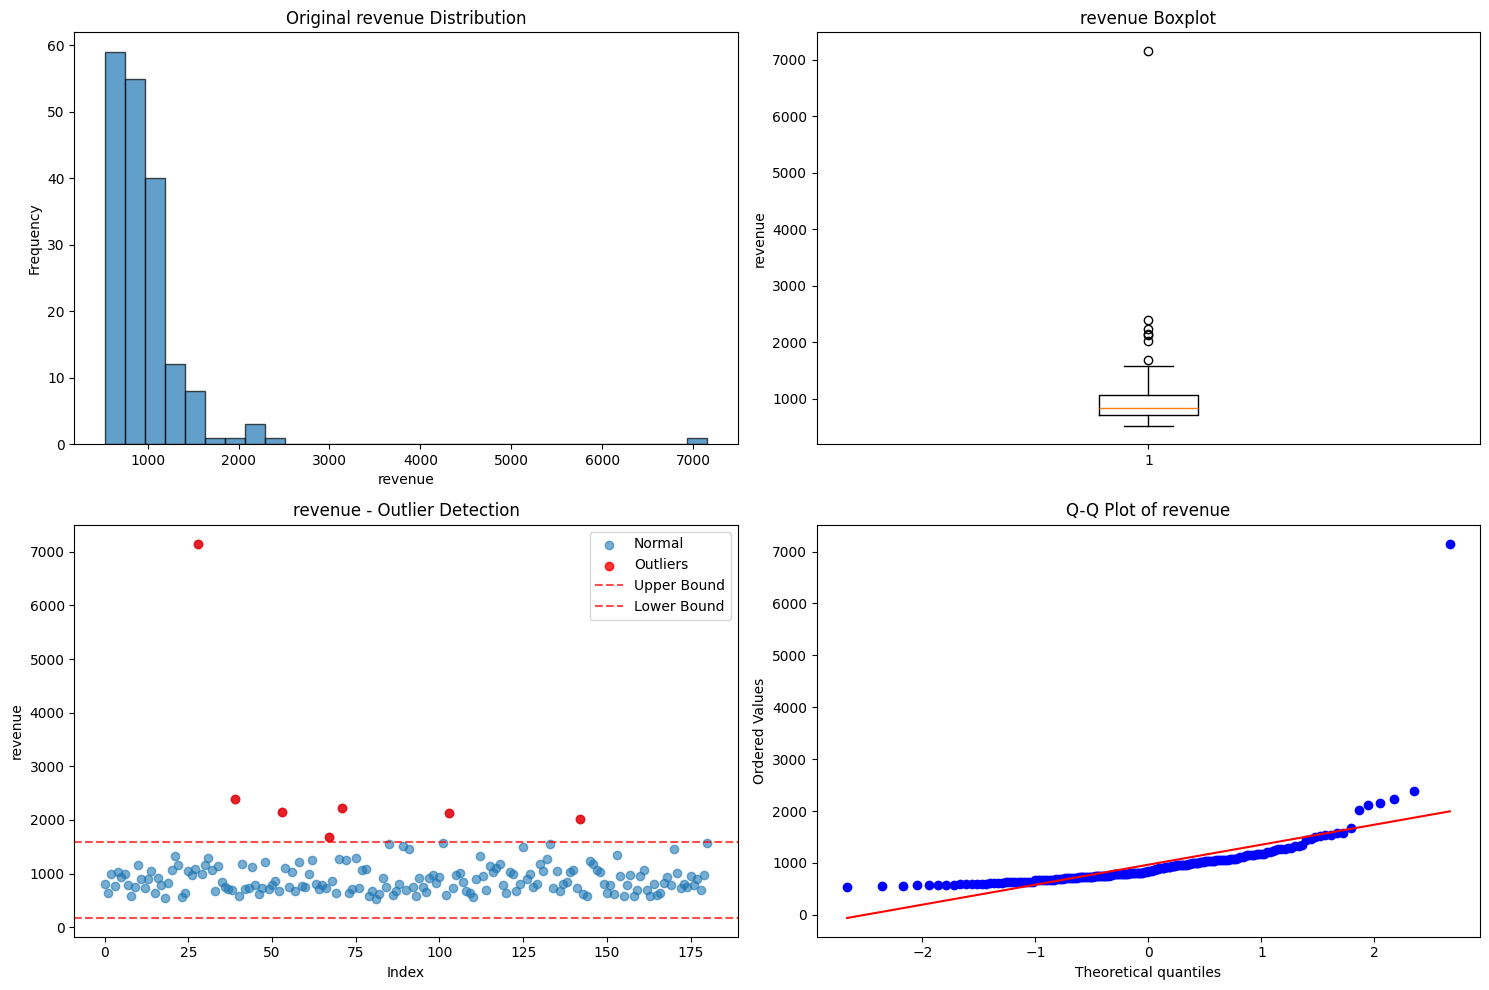

In [4]:
fig = plot_outlier_analysis(df, 'revenue')
plt.show()

In [5]:
df_clean = handle_outliers(df, 'revenue', method='clip')

Outlier detection for 'revenue':
Q1: 706.19, Q3: 1062.80, IQR: 356.61
Bounds: [171.28, 1597.71]
Found 7 outliers (3.87% of data)
Clipped 7 outliers to bounds


In [6]:
df_clean.to_csv('../data/processed/coffee_sales_no_outliers.csv', index=False)